In [1]:
import numpy as np
import pandas as pd
import os
from google.colab import files

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
#upload_file = files.upload()

In [4]:
file  = 'taxi_trip_pricing.csv'

In [5]:
data = pd.read_csv(file)

In [6]:
df = data.copy()
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [7]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [11]:
df.shape

(1000, 11)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [13]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print(f'{numeric_columns}')

['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']


In [14]:
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
print(f'{categorical_columns}')

['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']


In [15]:
for column in numeric_columns:
    df[column]=df[column].fillna(df[column].median())

In [16]:
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [17]:
# numeric_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
#                    'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

# for column in numeric_columns:
#     df[column].fillna(df[column].median(), inplace=True)


# categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# for column in categorical_columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

# print(df.isnull().sum())


In [18]:
df.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [19]:
df['Time_of_Day'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,1000.0,27.00852,19.402661,1.2300,13.10750,25.8300,37.78250,146.067047
Passenger_Count,1000.0,2.45300,1.079331,1.0000,2.00000,2.0000,3.00000,4.000000
Base_Fare,1000.0,3.50384,0.848115,2.0100,2.77000,3.5200,4.20250,5.000000
Per_Km_Rate,1000.0,1.23265,0.418932,0.5000,0.87000,1.2200,1.58000,2.000000
Per_Minute_Rate,1000.0,0.29277,0.112664,0.1000,0.19750,0.2900,0.38250,0.500000
Trip_Duration_Minutes,1000.0,62.10521,31.339464,5.0100,37.10750,61.8600,87.77500,119.840000
Trip_Price,1000.0,56.54156,39.492129,6.1269,34.57885,50.0745,67.47665,332.043689


In [21]:
grouped_stats = df.groupby('Time_of_Day')['Trip_Price'].agg(
    Q1 = lambda x: x.quantile(0.25),
    Q2 = lambda x: x.quantile(0.50),
    Q3 = lambda x: x.quantile(0.75),
    IQR = lambda x: x.quantile(0.75)-x.quantile(0.25),
    Lower_Bound = lambda x: x.quantile(0.25) - 1.5*(x.quantile(0.75)-x.quantile(0.25)),
    Upper_Bound = lambda x: x.quantile(0.75) + 1.5*(x.quantile(0.75)-x.quantile(0.25))
).reset_index()
print(grouped_stats)

  Time_of_Day        Q1       Q2        Q3       IQR  Lower_Bound  Upper_Bound
0   Afternoon  34.35430  50.0745  68.65440  34.30010   -17.095850   120.104550
1     Evening  35.70150  49.7873  67.14995  31.44845   -11.471175   114.322625
2     Morning  34.34565  50.0745  66.11200  31.76635   -13.303875   113.761525
3       Night  36.14640  50.0745  66.63180  30.48540    -9.581700   112.359900


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

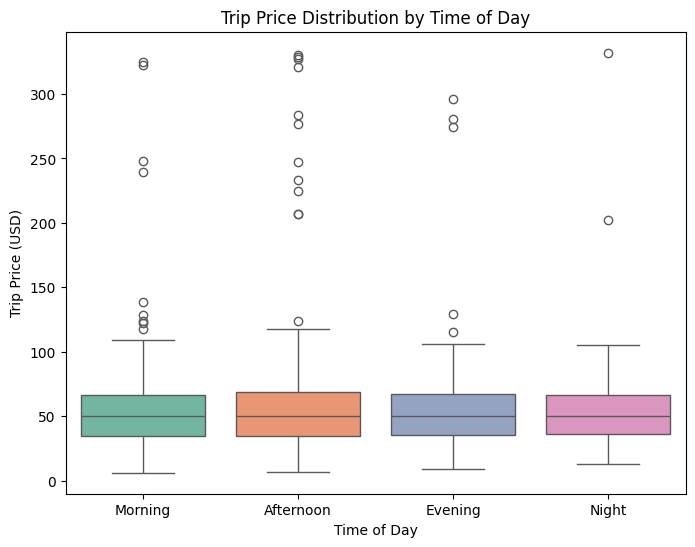

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Time_of_Day', y='Trip_Price', data=df, palette='Set2')
plt.title('Trip Price Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Trip Price (USD)')
plt.show()

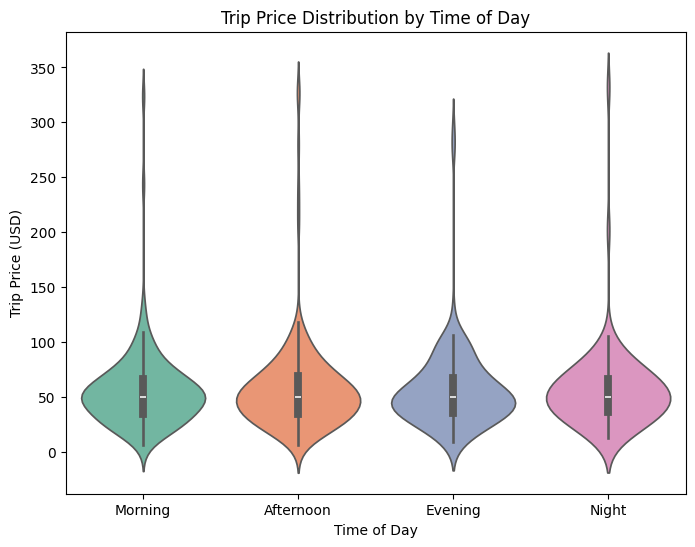

In [24]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Time_of_Day',y='Trip_Price',data=df,palette='Set2')
plt.title('Trip Price Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Trip Price (USD)')
plt.show()

In [25]:
grouped_stats_2 = df.groupby('Time_of_Day')['Trip_Duration_Minutes'].agg(
    Q1 = lambda x: x.quantile(0.25),
    Q2 = lambda x: x.quantile(0.50),
    Q3 = lambda x: x.quantile(0.75),
    IQR = lambda x: x.quantile(0.75)-x.quantile(0.25),
    Lower_Bound = lambda x: x.quantile(0.25) - 1.5*(x.quantile(0.75)-x.quantile(0.25)),
    Upper_Bound = lambda x: x.quantile(0.75) + 1.5*(x.quantile(0.75)-x.quantile(0.25))
).reset_index()
print(grouped_stats_2)

  Time_of_Day      Q1     Q2     Q3     IQR  Lower_Bound  Upper_Bound
0   Afternoon  35.460  61.86  88.42  52.960     -43.9800     167.8600
1     Evening  37.910  59.18  82.65  44.740     -29.2000     149.7600
2     Morning  40.875  63.28  90.86  49.985     -34.1025     165.8375
3       Night  33.260  60.53  80.78  47.520     -38.0200     152.0600


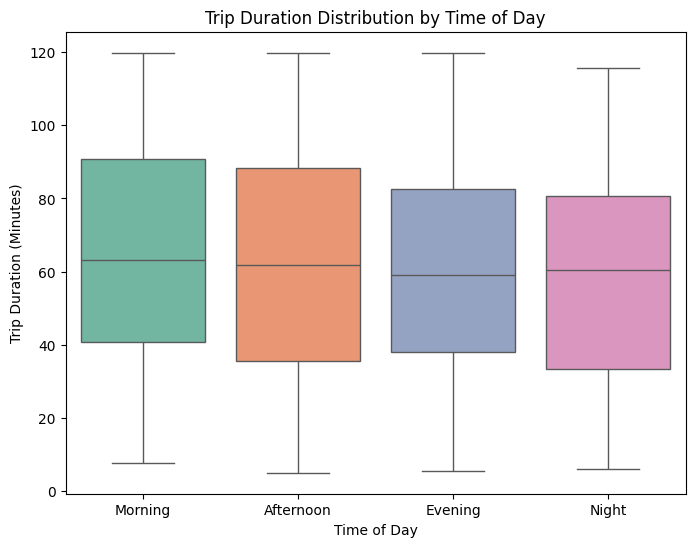

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Time_of_Day', y='Trip_Duration_Minutes', data=df, palette='Set2')
plt.title('Trip Duration Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

In [27]:
group_stats_3 = df.groupby('Time_of_Day')['Trip_Distance_km'].agg(
    Q1 = lambda x: x.quantile(0.25),
    Q2 = lambda x: x.quantile(0.50),
    Q3 = lambda x: x.quantile(0.75),
    IQR = lambda x: x.quantile(0.75)-x.quantile(0.25),
    Lower_Bound = lambda x: x.quantile(0.25) - 1.5*(x.quantile(0.75)-x.quantile(0.25)),
    Upper_Bound = lambda x: x.quantile(0.75) + 1.5*(x.quantile(0.75)-x.quantile(0.25))
).reset_index()
print(group_stats_3)

  Time_of_Day      Q1     Q2      Q3     IQR  Lower_Bound  Upper_Bound
0   Afternoon  13.480  26.40  38.680  25.200     -24.3200      76.4800
1     Evening  13.350  25.83  38.885  25.535     -24.9525      77.1875
2     Morning  12.365  25.28  35.375  23.010     -22.1500      69.8900
3       Night  14.190  25.83  33.340  19.150     -14.5350      62.0650


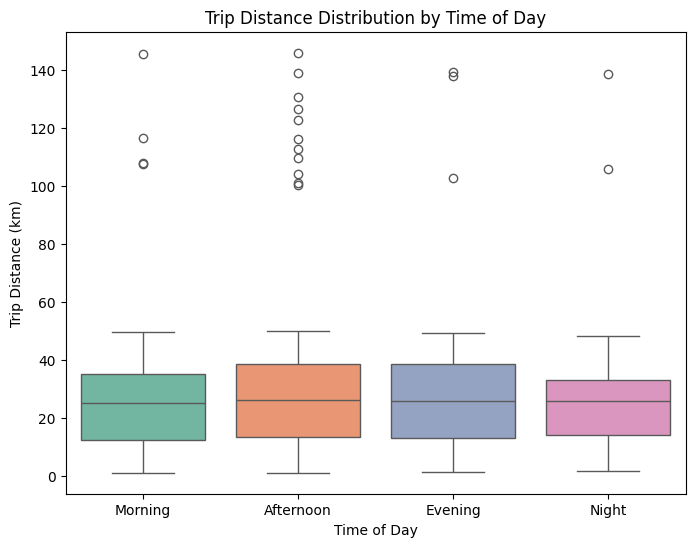

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Time_of_Day',y='Trip_Distance_km',data=df,palette='Set2')
plt.title('Trip Distance Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Trip Distance (km)')
plt.show()

In [29]:
df['Traffic_Conditions'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [30]:
Time_of_Day_Counts = df['Time_of_Day'].value_counts()
#all_sum = Time_of_Day_Counts.sum()
print(Time_of_Day_Counts)
#print(all_sum)

Time_of_Day
Afternoon    421
Morning      283
Evening      203
Night         93
Name: count, dtype: int64


In [31]:
traffic_counts = df['Traffic_Conditions'].value_counts()

print(f"Low Traffic: {traffic_counts.get('Low', 0)}")
print(f"Medium Traffic: {traffic_counts.get('Medium', 0)}")
print(f"High Traffic: {traffic_counts.get('High', 0)}")


Low Traffic: 447
Medium Traffic: 371
High Traffic: 182


In [32]:
traffic_count_by_time = df.groupby(['Time_of_Day', 'Traffic_Conditions']).size().reset_index(name='Count')

# Display the counts for each category
#print("Traffic Condition Counts by Time of Day:")
#print(traffic_count_by_time)

# Optional: Display as a pivot table for better readability
pivot_table = traffic_count_by_time.pivot(index='Time_of_Day', columns='Traffic_Conditions', values='Count').fillna(0)
print(pivot_table)

Traffic_Conditions  High  Low  Medium
Time_of_Day                          
Afternoon             74  195     152
Evening               46   80      77
Morning               43  132     108
Night                 19   40      34


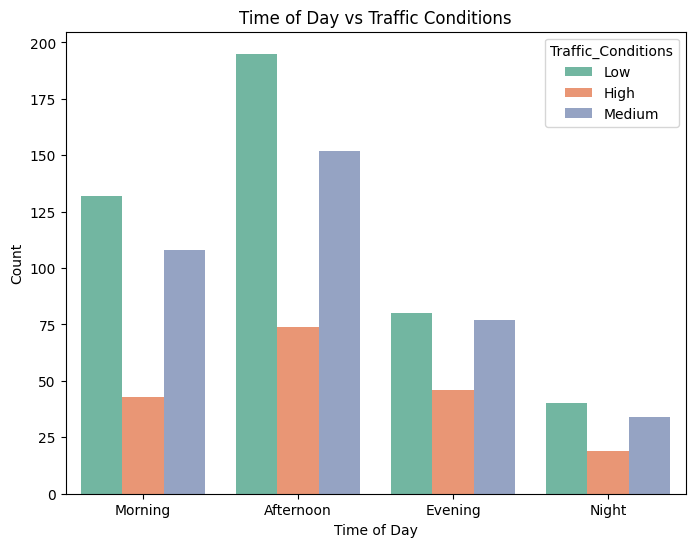

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='Time_of_Day',hue='Traffic_Conditions',data=df,palette='Set2')
plt.title('Time of Day vs Traffic Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

In [34]:
df['Weather'].unique()

array(['Clear', 'Rain', 'Snow'], dtype=object)

In [35]:
weather_counts = df['Weather'].value_counts()

print(f"Clear Weather: {weather_counts.get('Clear', 0)}")
print(f"Rainy Weather: {weather_counts.get('Rain', 0)}")
print(f"Snow Falling: {weather_counts.get('Snow', 0)}")

Clear Weather: 717
Rainy Weather: 227
Snow Falling: 56


In [36]:
weather_counts_by_times = df.groupby(['Time_of_Day','Weather']).size().reset_index(name='Count')
pivot_table = weather_counts_by_times.pivot(index = 'Time_of_Day', columns = 'Weather',values = 'Count').fillna(0)
print(pivot_table)

Weather      Clear  Rain  Snow
Time_of_Day                   
Afternoon      301   102    18
Evening        140    45    18
Morning        210    58    15
Night           66    22     5


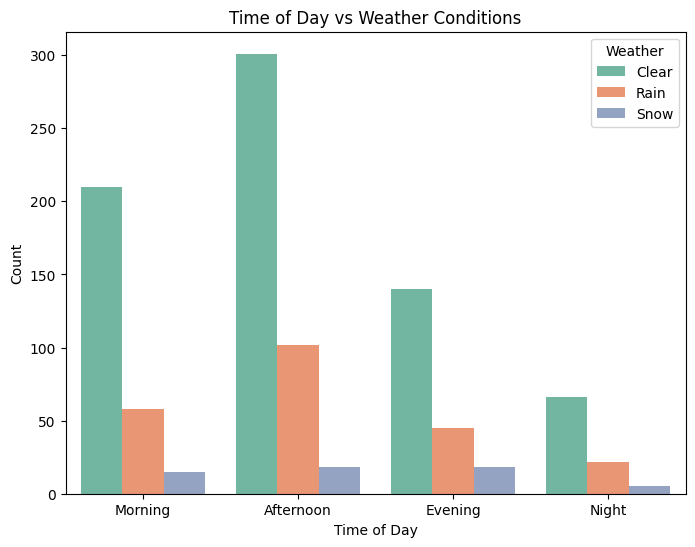

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Time_of_Day', hue='Weather', data=df, palette='Set2')
plt.title('Time of Day vs Weather Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()


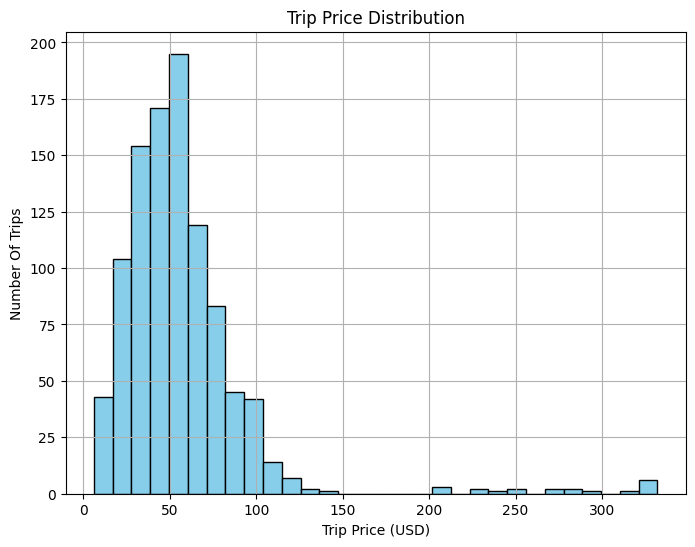

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(df['Trip_Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Trip Price Distribution')
plt.xlabel('Trip Price (USD)')
plt.ylabel('Number Of Trips')
plt.grid(True)
plt.show()

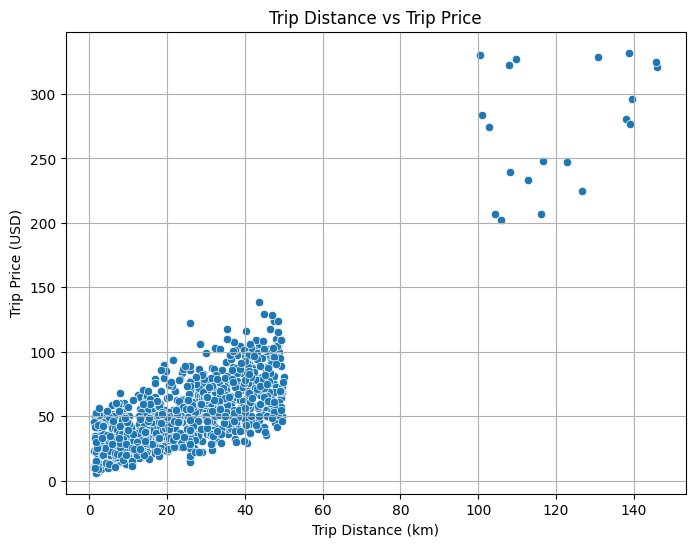

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', data=df)
plt.title('Trip Distance vs Trip Price')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price (USD)')
plt.grid(True)
plt.show()

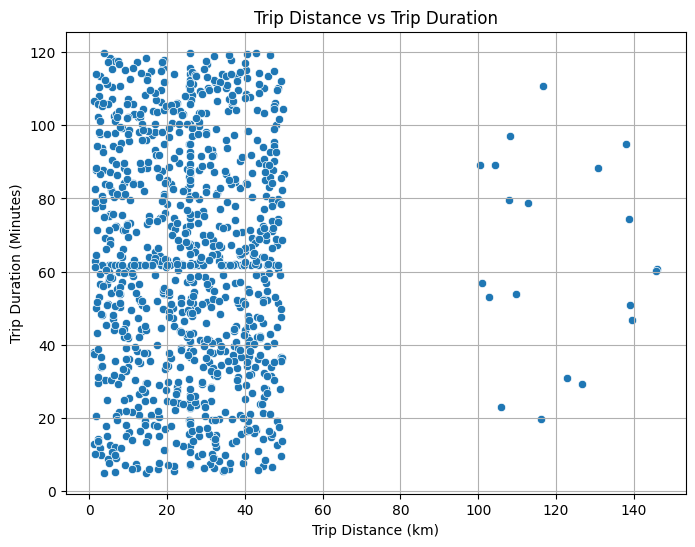

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Trip_Distance_km', y='Trip_Duration_Minutes', data=df)
plt.title('Trip Distance vs Trip Duration')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Duration (Minutes)')
plt.grid(True)
plt.show()

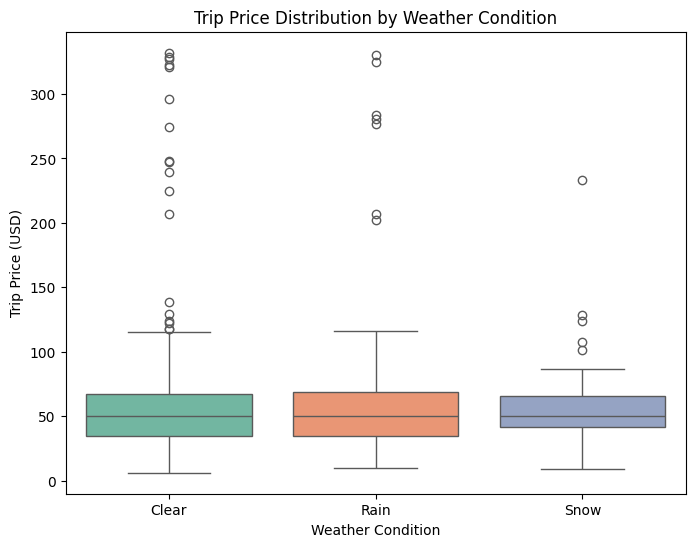

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weather', y='Trip_Price', data=df, palette='Set2')
plt.title('Trip Price Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Trip Price (USD)')
plt.show()

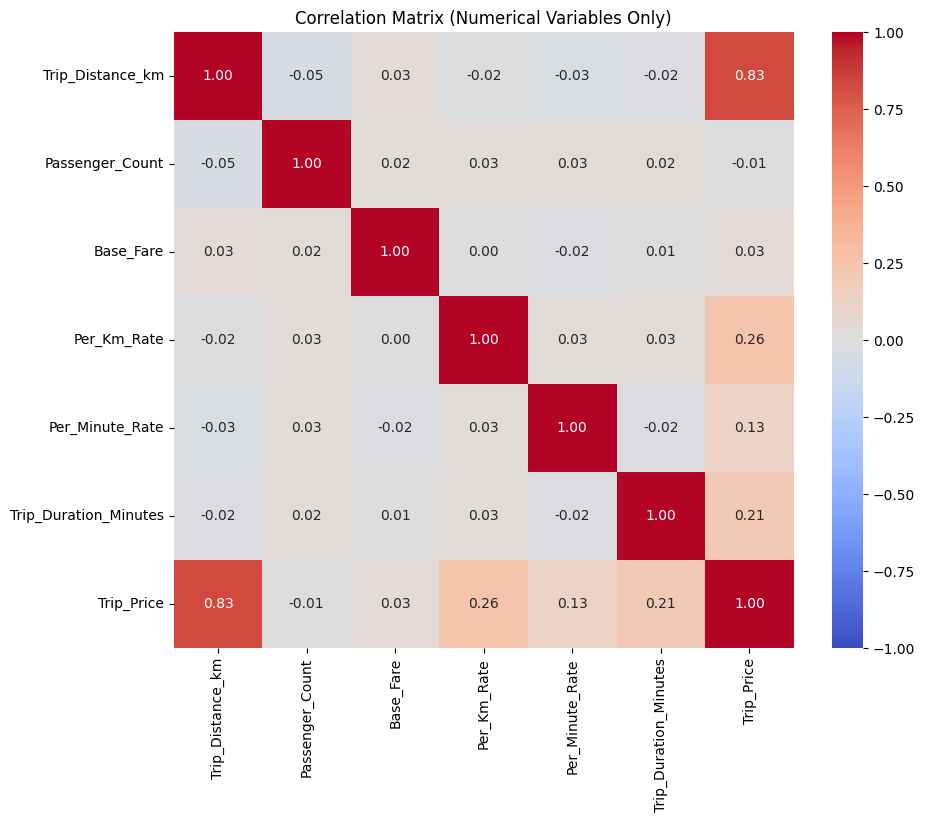

In [42]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

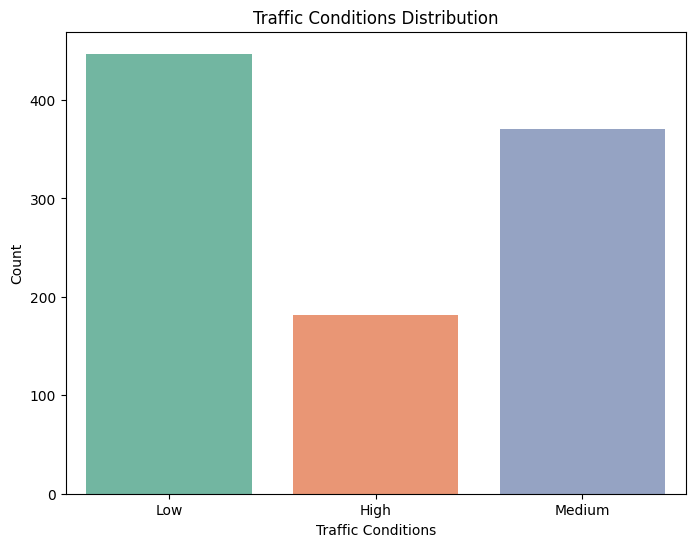

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x='Traffic_Conditions',hue='Traffic_Conditions', data=df, palette='Set2')
plt.title('Traffic Conditions Distribution')
plt.xlabel('Traffic Conditions')
plt.ylabel('Count')
plt.show()

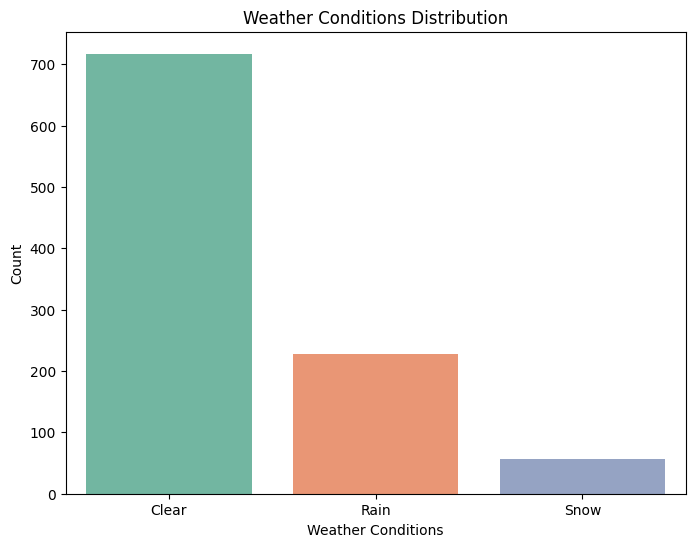

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x='Weather',hue='Weather', data=df, palette='Set2')
plt.title('Weather Conditions Distribution')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()

# **Outlier Analysis**

Trip Price Distribution with Outliers

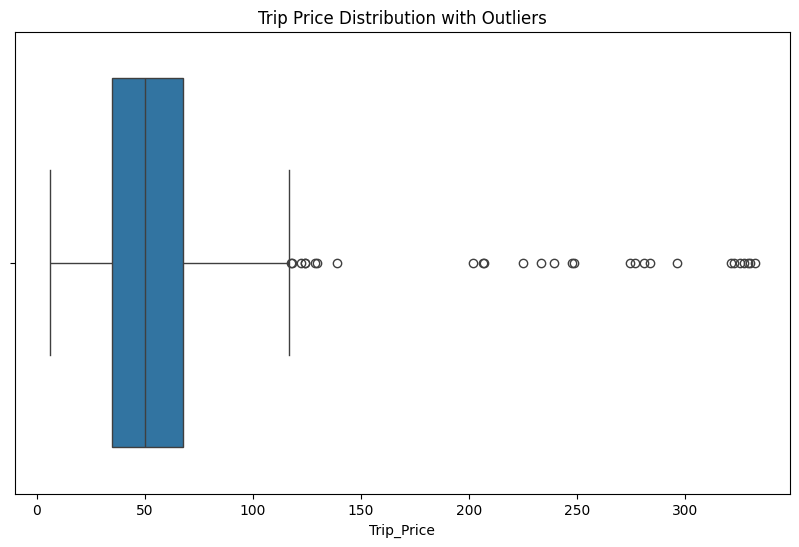

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trip_Price', data=df)
plt.title('Trip Price Distribution with Outliers')
plt.show()


Trip Distance Distribution with Outliers

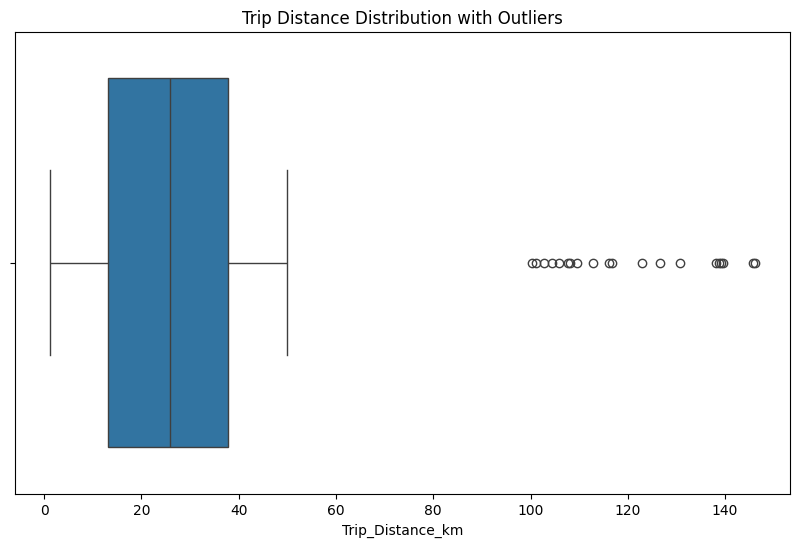

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trip_Distance_km', data=df)
plt.title('Trip Distance Distribution with Outliers')
plt.show()

In [47]:
Q1 = df['Trip_Price'].quantile(0.25)
Q3 = df['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Trip_Price'] < lower_bound) | (df['Trip_Price'] > upper_bound)]
print("Outliers in Trip Price:")
print(outliers)

Outliers in Trip Price:
     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
22         105.943550       Night     Weekend              2.0   
27         138.098328     Evening     Weekend              4.0   
64         146.067047   Afternoon     Weekday              2.0   
108        112.830958   Afternoon     Weekday              2.0   
110        102.747556     Evening     Weekday              2.0   
141        109.616082   Afternoon     Weekday              4.0   
225        130.809001   Afternoon     Weekday              1.0   
245         46.490000   Afternoon     Weekday              3.0   
267        116.196064   Afternoon     Weekend              4.0   
268        139.062230   Afternoon     Weekday              2.0   
278         35.400000     Morning     Weekday              3.0   
287        100.380420   Afternoon     Weekday              3.0   
302        145.747060     Morning     Weekday              3.0   
338        116.667681     Morning     Weekday       

In [48]:
Q1_distance = df['Trip_Distance_km'].quantile(0.25)
Q3_distance = df['Trip_Distance_km'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance
lower_bound_distance = Q1_distance - 1.5 * IQR
upper_bound_distance = Q3_distance + 1.5 * IQR
outliers_distance = df[(df['Trip_Distance_km'] < lower_bound_distance) | (df['Trip_Distance_km'] > upper_bound_distance)]
print("Outliers in Trip Distance:")
print(outliers_distance)

Outliers in Trip Distance:
     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
22         105.943550       Night     Weekend              2.0   
27         138.098328     Evening     Weekend              4.0   
64         146.067047   Afternoon     Weekday              2.0   
108        112.830958   Afternoon     Weekday              2.0   
110        102.747556     Evening     Weekday              2.0   
141        109.616082   Afternoon     Weekday              4.0   
225        130.809001   Afternoon     Weekday              1.0   
267        116.196064   Afternoon     Weekend              4.0   
268        139.062230   Afternoon     Weekday              2.0   
287        100.380420   Afternoon     Weekday              3.0   
302        145.747060     Morning     Weekday              3.0   
338        116.667681     Morning     Weekday              2.0   
410        104.371791   Afternoon     Weekday              1.0   
481        107.786832     Morning     Weekend    

In [49]:
df['Trip_Distance_km'].describe()


,Trip_Distance_km
count,1000.000000
mean,27.008520
std,19.402661
min,1.230000
25%,13.107500
50%,25.830000
75%,37.782500
max,146.067047


In [50]:
median_distance = df['Trip_Distance_km'].median()
df['Trip_Distance_km'] = df['Trip_Distance_km'].apply(lambda x: median_distance if x in outliers_distance['Trip_Distance_km'].values else x)

In [51]:
df['Trip_Distance_km'].describe()

,Trip_Distance_km
count,1000.000000
mean,25.112000
std,13.871956
min,1.230000
25%,13.107500
50%,25.830000
75%,36.727500
max,49.990000


In [52]:
df['Trip_Price'] = df['Trip_Price'].clip(lower=lower_bound, upper=upper_bound)

print(df['Trip_Price'].describe())

count    1000.000000
mean       53.302532
std        24.761083
min         6.126900
25%        34.578850
50%        50.074500
75%        67.476650
max       116.823350
Name: Trip_Price, dtype: float64


# **Time Factor and Price Relationship**

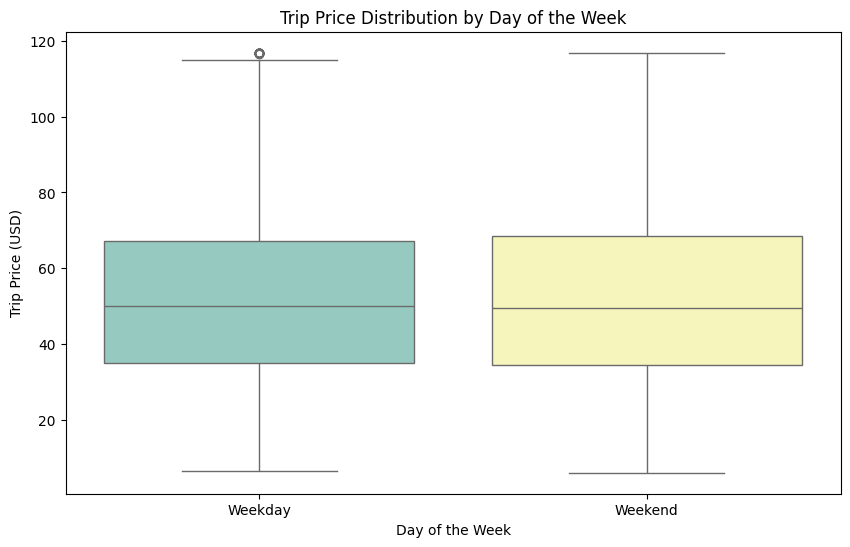

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y='Trip_Price', data=df, palette='Set3')
plt.title('Trip Price Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Price (USD)')
plt.show()

# **Interaction of Categorical Variables**

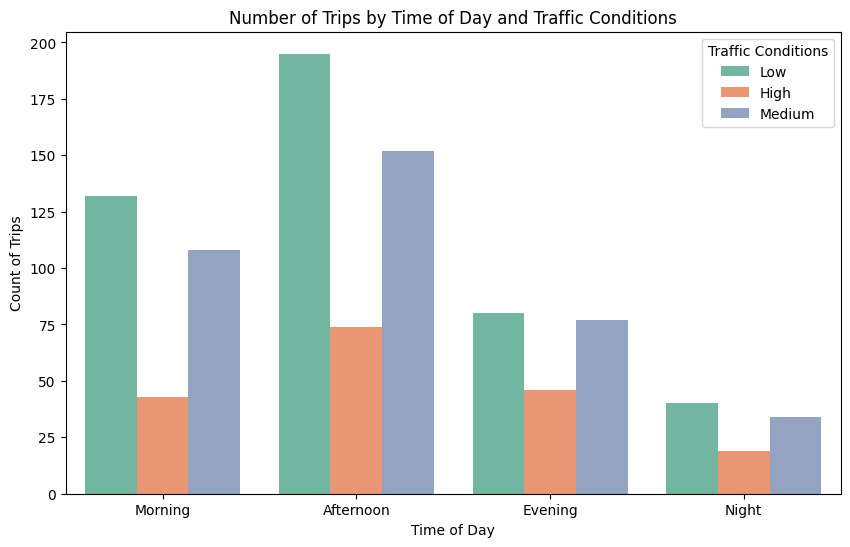

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Time_of_Day', hue='Traffic_Conditions', data=df, palette='Set2')
plt.title('Number of Trips by Time of Day and Traffic Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Count of Trips')
plt.legend(title='Traffic Conditions')
plt.show()

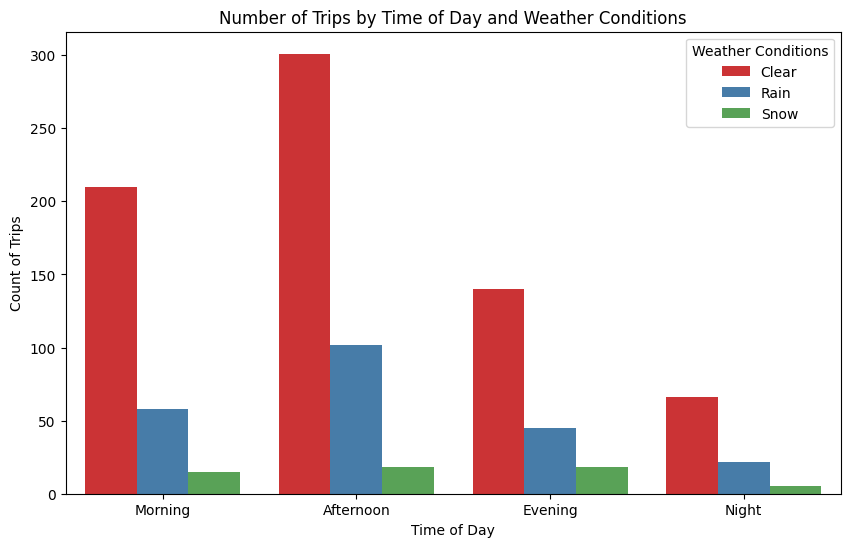

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Time_of_Day', hue='Weather', data=df, palette='Set1')
plt.title('Number of Trips by Time of Day and Weather Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Count of Trips')
plt.legend(title='Weather Conditions')
plt.show()

# **Machine Learning**

In [56]:
label_encoders = {}


categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:

    original_values = df[column].unique()


    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


    encoded_values = df[column].unique()

    decoded_values = label_encoders[column].inverse_transform(encoded_values)


    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")


Time_of_Day Encoding and Decoding:
2 -> Morning
0 -> Afternoon
1 -> Evening
3 -> Night

Day_of_Week Encoding and Decoding:
0 -> Weekday
1 -> Weekend

Traffic_Conditions Encoding and Decoding:
1 -> Low
0 -> High
2 -> Medium

Weather Encoding and Decoding:
0 -> Clear
1 -> Rain
2 -> Snow


In [57]:
X = df.drop(columns=['Trip_Price'])
y = df['Trip_Price']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error : {mse_rf}')
print(f'R^2 Score : {r2_rf}')

Mean Squared Error : 65.76221284906421
R^2 Score : 0.8898557321067313


In [60]:
model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {linear_mse}')
print(f'R^2 Score: {linear_r2}')

Mean Squared Error: 100.59409455719069
R^2 Score: 0.8315162702201302


In [61]:
tree_model = DecisionTreeRegressor(random_state=42)


tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)

tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print(f'Mean Squared Error : {tree_mse}')
print(f'R^2 Score : {tree_r2}')

Mean Squared Error : 244.81022079058744
R^2 Score : 0.589970571646413


In [62]:
models = [ 'Random Forest','Linear Regression','Decision Tree']
mse_scores = [mse_rf,linear_mse,tree_mse]
r2_scores = [r2_rf,linear_r2,tree_r2]

results_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R^2 ': r2_scores
})


print(results_df)

               Model         MSE      R^2 
0      Random Forest   65.762213  0.889856
1  Linear Regression  100.594095  0.831516
2      Decision Tree  244.810221  0.589971
